# YOLOV8 Segmentation

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [6]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EjqdazxdXsdrxchdw66l")
project = rf.workspace("fire-flame-contour-detection").project("fire-flame-contours-detection")
version = project.version(2)
dataset = version.download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fire-Flame-Contours-Detection-2 in yolov8:: 100%|██████████| 246/246 [00:00<00:00, 2551.92it/s]


## Custom Training

In [9]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/Fire-Flame-Contours-Detection-2/data.yaml epochs=100 imgsz=320

/content
100% 22.8M/22.8M [00:00<00:00, 262MB/s]
New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/Fire-Flame-Contours-Detection-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stri

In [10]:
!ls {HOME}/runs/segment/train/

args.yaml					    labels.jpg	      train_batch2.jpg
BoxF1_curve.png					    MaskF1_curve.png  train_batch540.jpg
BoxP_curve.png					    MaskP_curve.png   train_batch541.jpg
BoxPR_curve.png					    MaskPR_curve.png  train_batch542.jpg
BoxR_curve.png					    MaskR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv       val_batch0_pred.jpg
confusion_matrix.png				    results.png       weights
events.out.tfevents.1713025260.d5a58dc2dbeb.3048.0  train_batch0.jpg
labels_correlogram.jpg				    train_batch1.jpg


/content


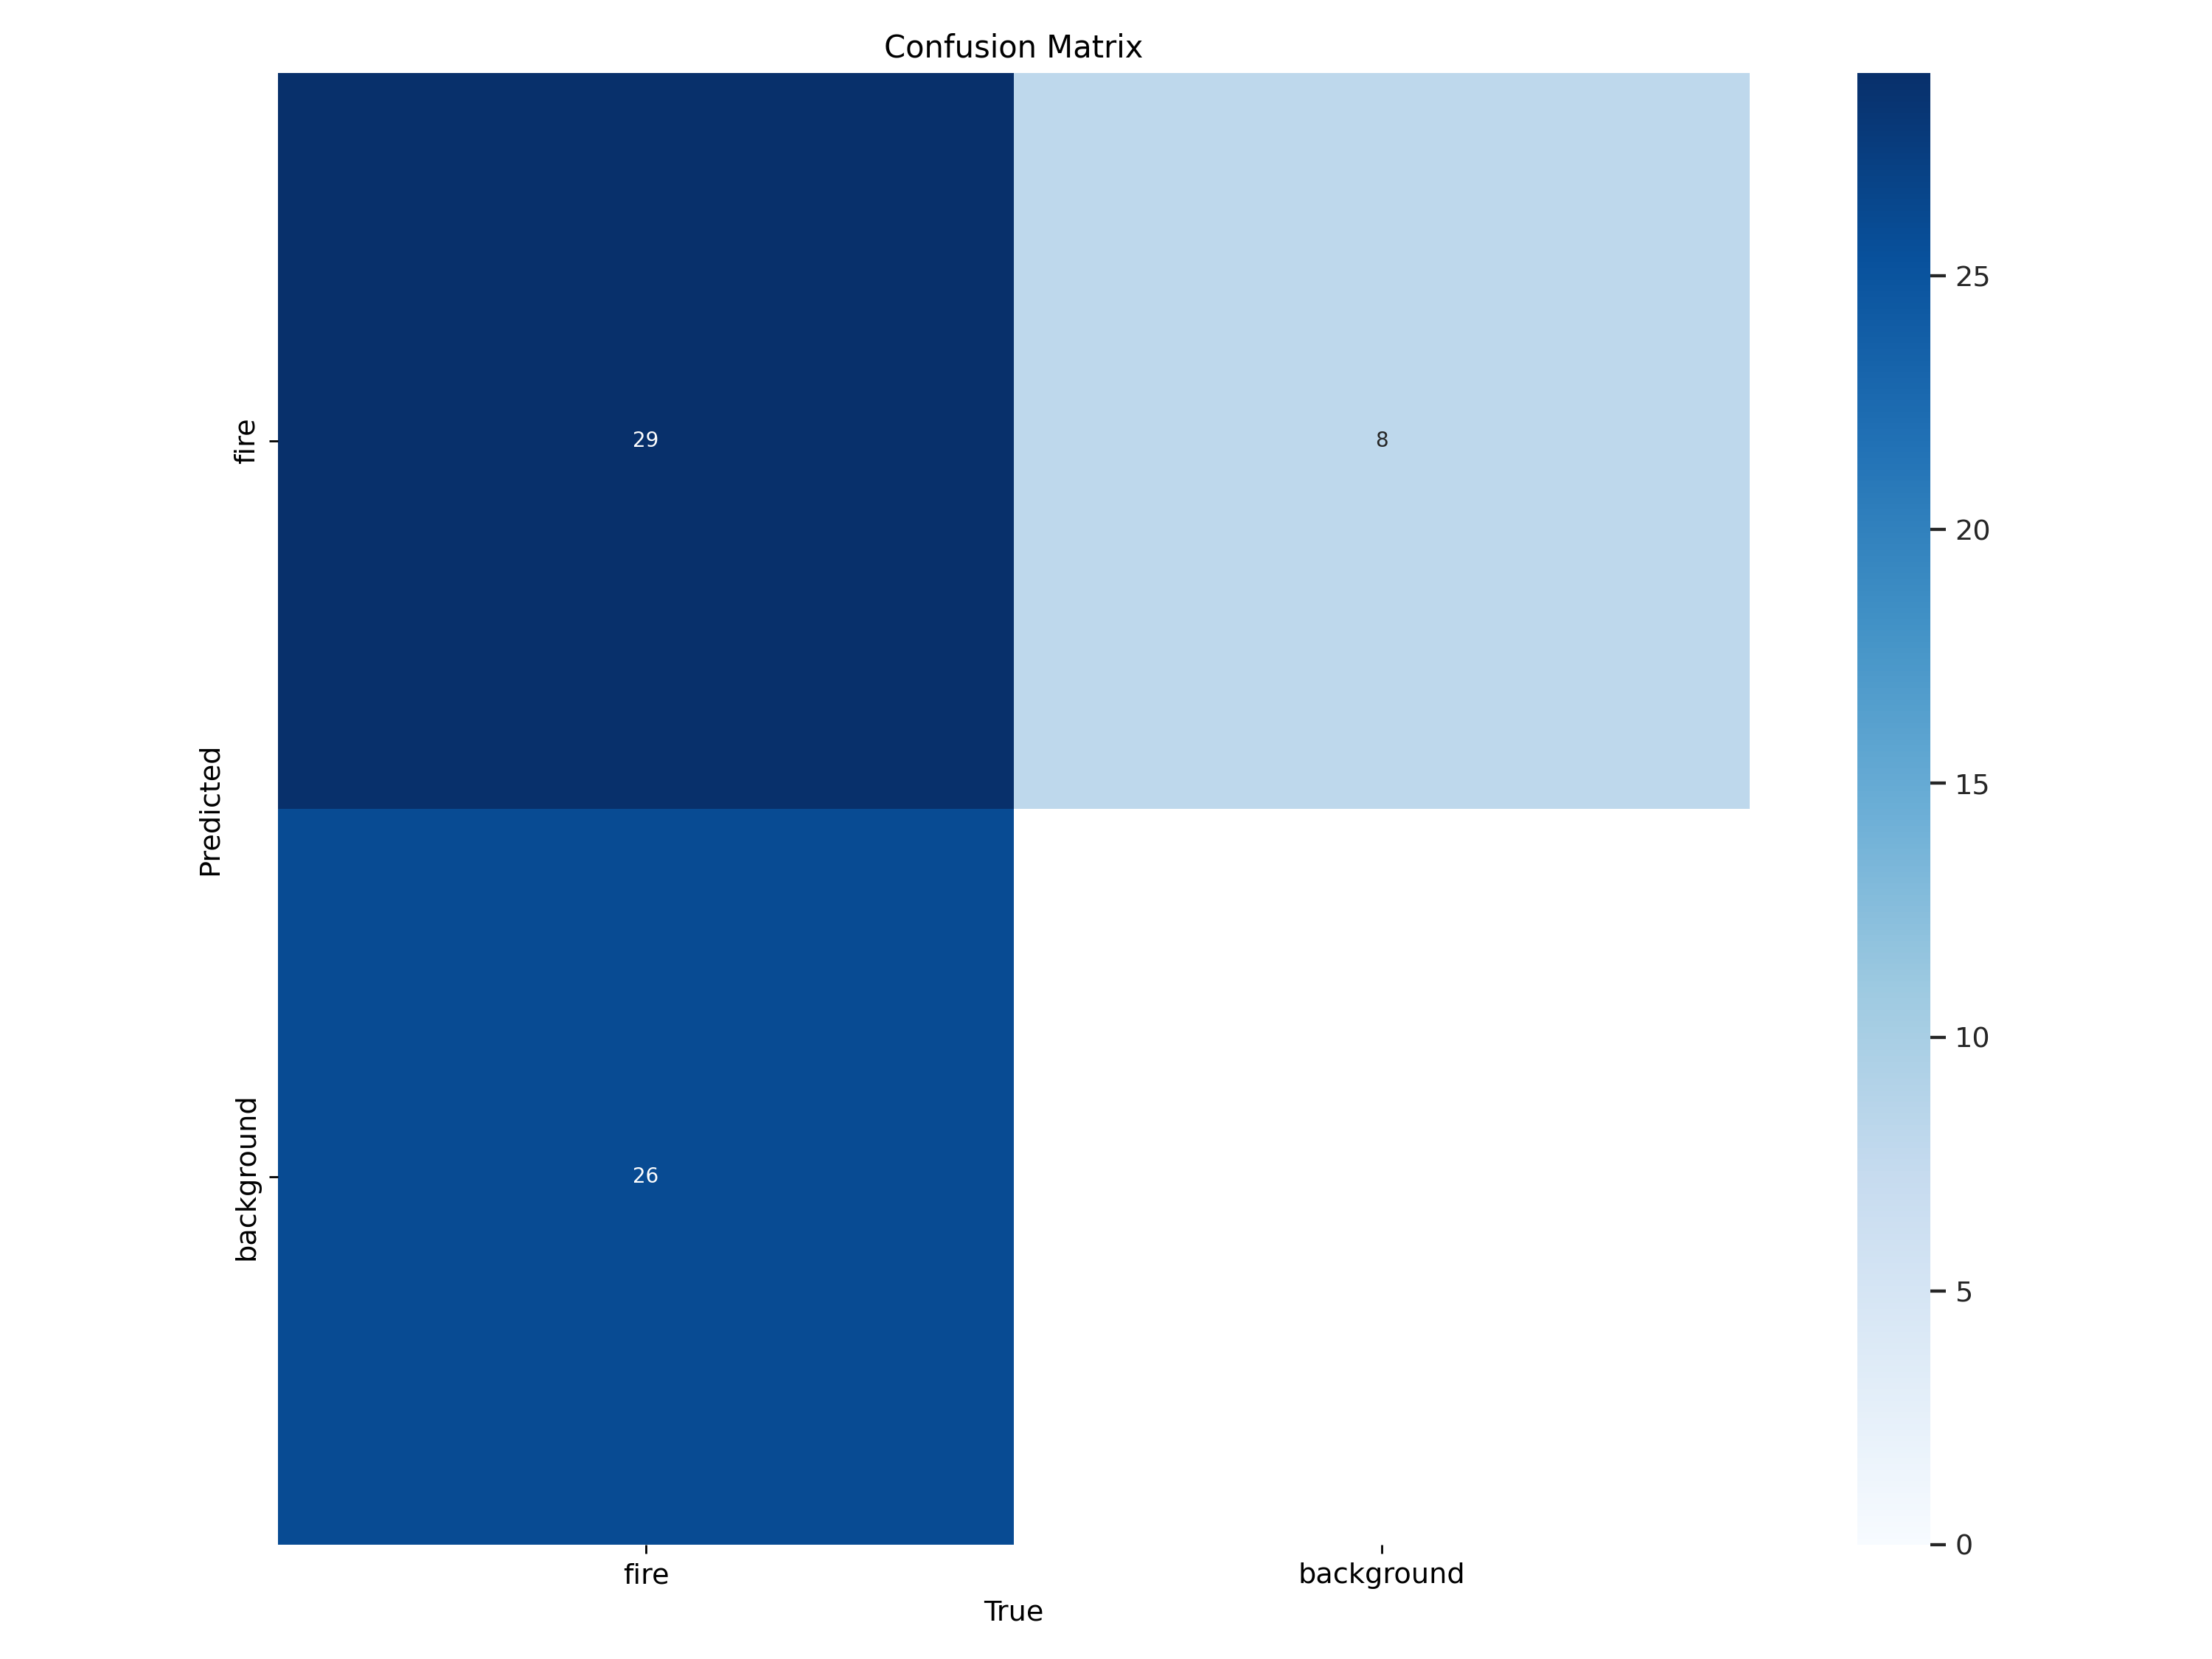

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


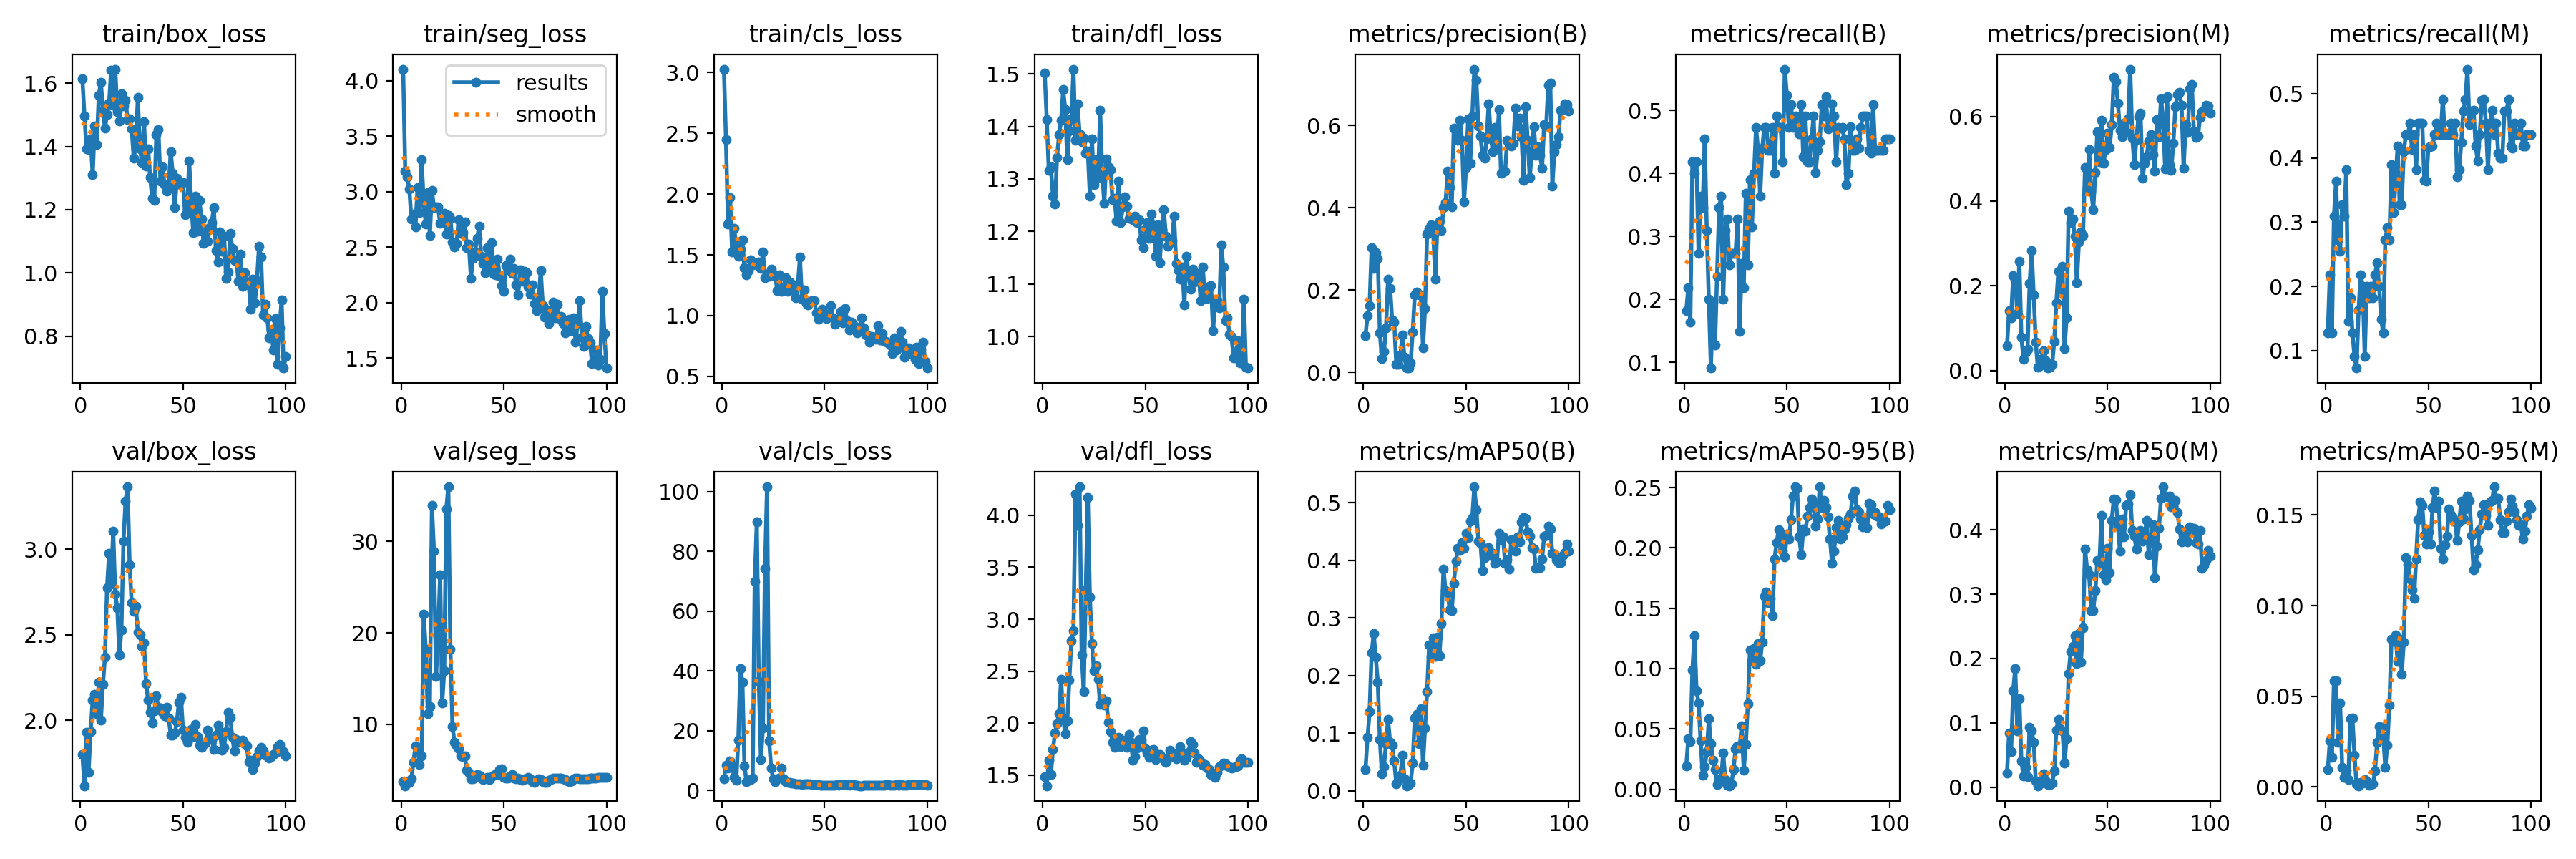

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


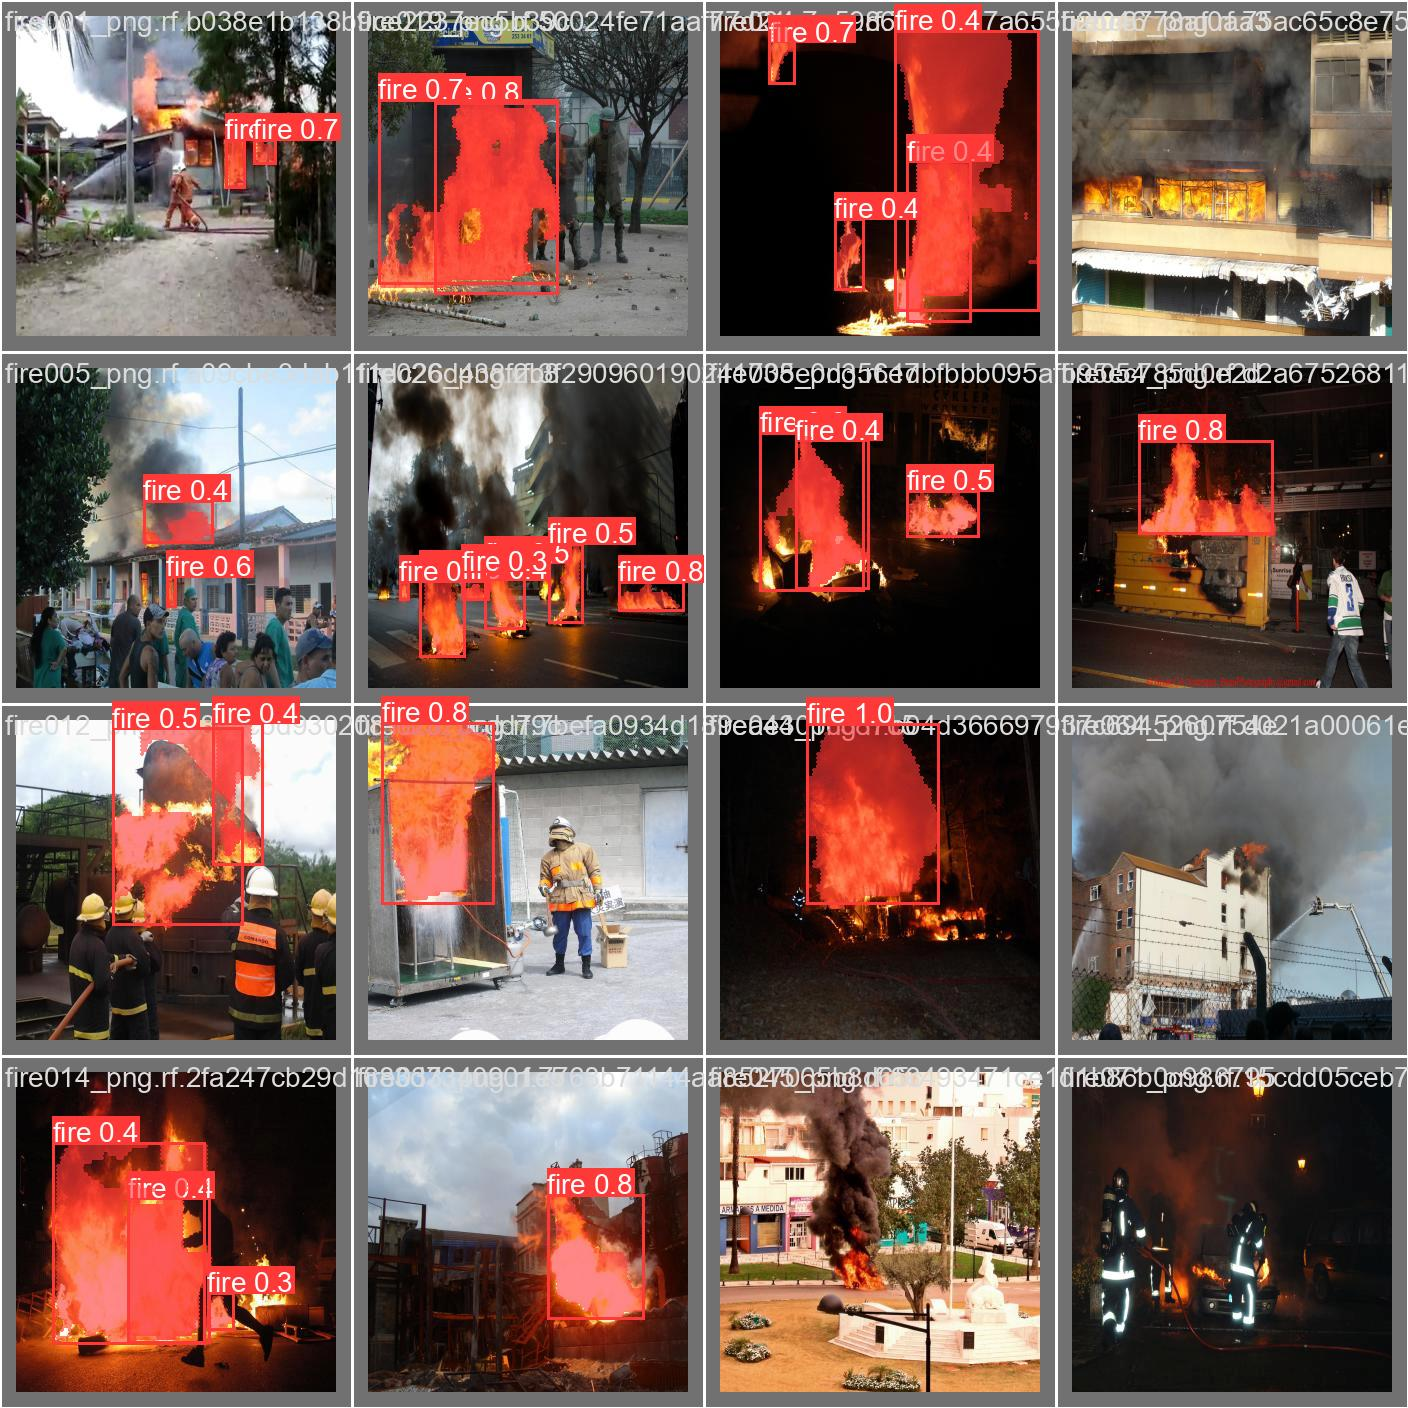

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validation Custom Model

In [14]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data=/content/Fire-Flame-Contours-Detection-2/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/Fire-Flame-Contours-Detection-2/valid/labels.cache... 24 images, 1 backgrounds, 0 corrupt: 100% 24/24 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.05it/s]
                   all         24         55      0.737      0.491      0.527      0.252      0.678      0.455      0.438      0.153
Speed: 0.1ms preprocess, 23.2ms inference, 0.0ms loss, 30.2ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https:/

## Testing with Custom Model

In [15]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source=/content/Fire-Flame-Contours-Detection-2/test/images save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/11 /content/Fire-Flame-Contours-Detection-2/test/images/fire004_png.rf.cefa1e0eae2adb5b60a06fbb779374c6.jpg: 320x320 (no detections), 12.7ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 2/11 /content/Fire-Flame-Contours-Detection-2/test/images/fire029_png.rf.28d81529aa16b732b5b06f8dd02dd62a.jpg: 320x320 2 fires, 13.2ms
image 3/11 /content/Fire-Flame-Contours-Detection-2/test/images/fire031_png.rf.93210f4c3a7269c19fafcbf8180963e3.jpg: 320x320 2 fires, 10.0ms
image 4/11 /content/Fire-Flame-Contours-Detection-2/test/images/fire040_png.rf.8723245e4ae7d53f5d542ae889d48b71.jpg: 320x320 2 fires, 13.2ms
image 5/11 /content/Fire-Flame-Contours-Detection-2/test/images/fire050_png.rf.73edaf293ee7d9ef494cf6dd554c1f09.jpg: 320x320 2 fires, 9.9ms
image 6/11 /content/Fire-Flame-Contours-Detection-2/test/imag

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
!zip -r /content/yolov8_runs.zip /content/runs


  adding: content/runs/ (stored 0%)
  adding: content/runs/segment/ (stored 0%)
  adding: content/runs/segment/train/ (stored 0%)
  adding: content/runs/segment/train/val_batch0_pred.jpg (deflated 10%)
  adding: content/runs/segment/train/BoxF1_curve.png (deflated 17%)
  adding: content/runs/segment/train/MaskPR_curve.png (deflated 26%)
  adding: content/runs/segment/train/train_batch542.jpg (deflated 5%)
  adding: content/runs/segment/train/BoxR_curve.png (deflated 17%)
  adding: content/runs/segment/train/labels_correlogram.jpg (deflated 48%)
  adding: content/runs/segment/train/train_batch1.jpg (deflated 3%)
  adding: content/runs/segment/train/labels.jpg (deflated 35%)
  adding: content/runs/segment/train/train_batch540.jpg (deflated 4%)
  adding: content/runs/segment/train/train_batch0.jpg (deflated 3%)
  adding: content/runs/segment/train/weights/ (stored 0%)
  adding: content/runs/segment/train/weights/last.pt (deflated 8%)
  adding: content/runs/segment/train/weights/best.pt (d

In [18]:
from google.colab import files
files.download("/content/yolov8_runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>